# Математичне моделювання польоту м'яча
---
## Змістовна постановка

Побудувати математичну модель, яка описує положення баскетбольного м'яча в будь-який момент часу після здійснення кидка, а також точність влучення у корзину.

Вхідні параметри:
* $x_0, y_0$ — початкові координати м'яча з моменту кидка;
* $x_k, y_k$ — координати центра корзини;
* $r, h$ — радіус та висота корзини;
* $v_0, \alpha_0$ — початкові швидкість та кут кидка.

## Концептуальна постановка

1. М'яч будемо вважати матеріальною точкою;
2. Нехтуємо силою опору повітря, внаслідок чого не розглядаємо випадки обертання м'яча;
3. Вважаємо, що рух м'яча відбувеється в одній площині з початковою точкою кидка та центром корзини;
4. Дослідження о'бєкта моделювання будемо проводити в рамках трьох законів Ньютона.

## Математична постановка

Задача — знайти функції $x(t)$, $y(t)$, $v_x(t)$, $v_y(t)$, що описують положення та швидкість м'яча після кидка в довільний момент часу $t$.

Побудуємо систему диференціальних рівнянь та визначимо початкові умови:
\begin{equation}
\begin{matrix}
& \left\{
\begin{matrix}
m\frac{dv_x}{dt}=0\\
m\frac{dv_y}{dt}=-mg\\
\frac{dx}{dt}=v_x(t)\\
\frac{dy}{dt}=v_y(t)\\
\end{matrix} \right.
\end{matrix}
\begin{matrix}
v_x(0)=v_0cos(\alpha_0)\\
v_y(0)=v_0sin(\alpha_0)\\
x(0)=x_0\\
y(0)=y_0\\
\end{matrix}
\end{equation}

Продиференціюємо та отримаємо наступні функції:
\begin{equation}
\begin{matrix}
v_x(t) = v_0cos(\alpha_0)\\
v_y(t) = -gt+v_0sin(\alpha_0)\\
x(t) = v_0cos(\alpha_0)t+x_0\\
y(t) = -\frac{g}{2}t^2+v_0sin(\alpha_0)t+y_0\\
\end{matrix}
\end{equation}

In [1]:
import matplotlib.pyplot as plt
from numpy import cos, sin, pi, ceil, arange
from matplotlib import rc
font = {'family': 'Verdana','weight': 'normal'}
rc('font', **font)

def rk4(f, f0, h, t):
    frk = [0 for i in range(len(t))]
    frk[0] = f0
    for i in range(len(t)-1):
        k1 = f(t[i])
        k2 = f(t[i]+(h/2)*k1)
        k3 = f(t[i]+(h/2)*k2)
        k4 = f(t[i]+h*k3)
        frk[i+1] = frk[i]+(h/6)*(k1+2*k2+2*k3+k4)
    return frk

def euler(f, f0, h, t):
    frk = [0 for i in range(len(t))]
    frk[0] = f0
    for i in range(len(t)-1):
        frk[i+1] = frk[i]+h*f(t[i])
    return frk

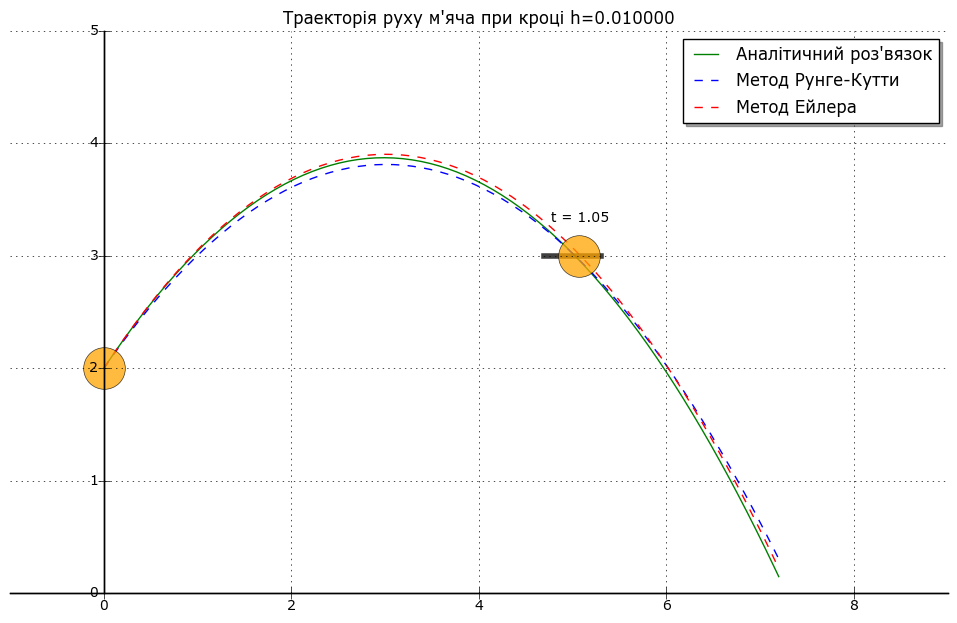

In [2]:
x0, y0    = 0.0, 2.0            # Початкові координати м'яча з моменту кидка
v0, a0    = 7.75, pi/3.5        # Початкова швидкість та кут кидка
xk, yk, r = 5.0, 3.0, 0.30      # Координати центра та радіус корзини
g,  h     = 9.8, 0.01           # Прискорення вільного падіння та крок системи
t         = arange(x0, 1.5, h)  # Часовий інтервал

plt.subplots(figsize=(5, 3))
plt.axes(xlim=(-1, ceil(max([v0*cos(a0)*i+x0 for i in t])+1)),
         ylim=(ceil(min([-(g/2)*i**2+v0*sin(a0)*i+y0 for i in t])-1), ceil(max([-(g/2)*i**2+v0*sin(a0)*i+y0 for i in t])+1)))

plt.plot([v0*cos(a0)*i+x0 for i in t],
         [-(g/2)*i**2+v0*sin(a0)*i+y0 for i in t],
         '-',
         color='green',
         label = u'Аналітичний роз\'вязок')

plt.plot(rk4(lambda t: v0*cos(a0), x0, h, t),
         rk4(lambda t: -g*t+v0*sin(a0), y0, h, t),
         '--',
         color='blue',
         label = u'Метод Рунге-Кутти')

plt.plot(euler(lambda t: v0*cos(a0), x0, h, t),
         euler(lambda t: -g*t+v0*sin(a0), y0, h, t),
         '--',
         color='red',
         label = u'Метод Ейлера')

plt.plot([xk-r, xk+r], [yk, yk], color='black', linewidth=4, alpha=0.75)
plt.grid(True)
plt.legend(loc='upper right', shadow=True)
plt.title(u'Траекторія руху м\'яча при кроці h=%f'%h)
plt.subplots_adjust(top=2.0, right=2.0)
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_position('zero')

accuracy, start = 0, False
plt.plot(x0, y0, 'o', ms=30, color='orange', alpha=0.75)
for i in range(len(t)):
    curr_x = v0*cos(a0)*t[i]+x0
    curr_y = -(g/2)*t[i]**2+v0*sin(a0)*t[i]+y0
    if (curr_y >= yk):
        start = True
    if (curr_y <= yk and start is True):
        plt.plot(curr_x, yk, 'o', ms=30, color='orange', alpha=0.75)
        plt.text(curr_x-r, yk+r, u't = %.2f'%t[i])
        break
    if (i == len(t)-1 and start is False):
        plt.plot(curr_x, curr_y, 'o', ms=30, color='orange', alpha=0.75)
        plt.text(curr_x-r, curr_y+r, u't = %.2f'%t[i])

plt.show()